In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import model_from_json
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Set CUDA_VISIBLE_DEVICES to an empty string
import tensorflow as tf

## Load Dataset

In [1]:
TRAIN_DIR = 'dataset/train'
TEST_DIR = 'dataset/test'

## Analysis of Dataset

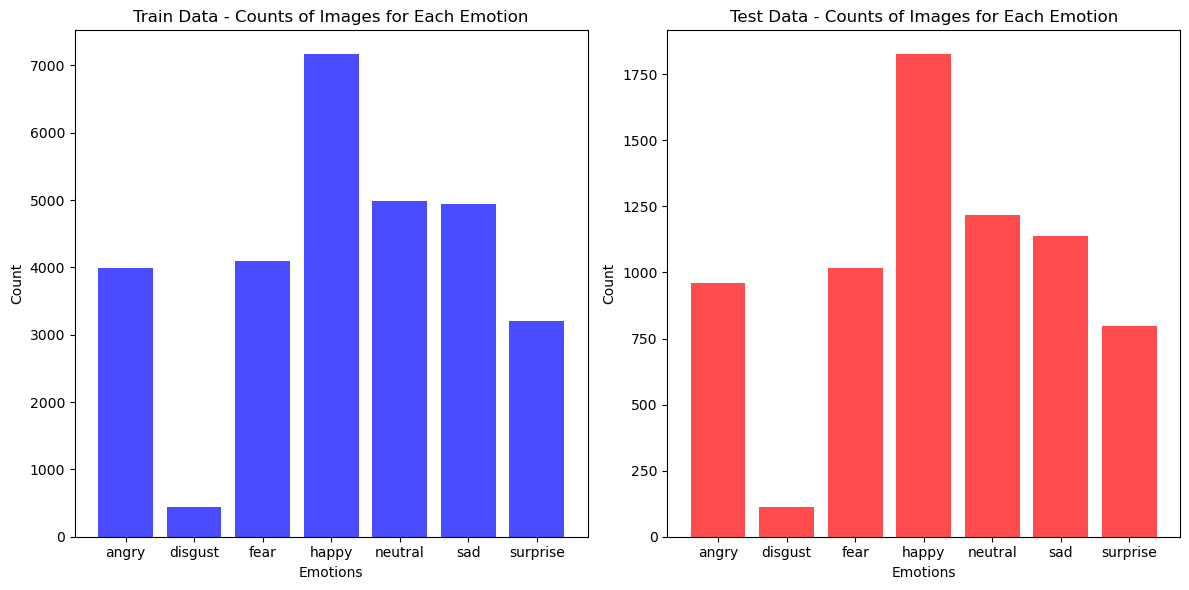

In [3]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def count_images(folder):
    counts = {}
    for emotion in os.listdir(folder):
        if os.path.isdir(os.path.join(folder, emotion)):
            counts[emotion] = len(os.listdir(os.path.join(folder, emotion)))
    return counts

train_counts = count_images(TRAIN_DIR)
test_counts = count_images(TEST_DIR)

emotions = list(train_counts.keys())

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(emotions, train_counts.values(), color='blue', alpha=0.7)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Train Data - Counts of Images for Each Emotion')

plt.subplot(1, 2, 2)
plt.bar(emotions, test_counts.values(), color='red', alpha=0.7)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Test Data - Counts of Images for Each Emotion')

plt.tight_layout()
plt.show()

In [10]:
# Create DataFrame for train and test counts
train_df = pd.DataFrame(train_counts.items(), columns=['Emotion', 'Train Count'])
test_df = pd.DataFrame(test_counts.items(), columns=['Emotion', 'Test Count'])

# Merge train and test DataFrames on 'Emotion' column
comparison_df = pd.merge(train_df, test_df, on='Emotion')

# Calculate percentage difference
comparison_df['Percentage Difference'] = round(((comparison_df['Train Count'] - comparison_df['Test Count']) / comparison_df['Train Count']) * 100)

print("Comparison Table:")
print(comparison_df)

Comparison Table:
    Emotion  Train Count  Test Count  Percentage Difference
0     angry         3993         960                   76.0
1   disgust          436         111                   75.0
2      fear         4103        1018                   75.0
3     happy         7164        1825                   75.0
4   neutral         4982        1216                   76.0
5       sad         4938        1139                   77.0
6  surprise         3205         797                   75.0


## Create dataframe from dataset folder of images

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

## dataframe of train and test model

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


## Feature Extraction

In [8]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [ ]:
train_features = extract_features(train['image'])

In [12]:
test_features = extract_features(test['image'])

### devide train and test feature with highest value of pixals

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

### label images

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
le = LabelEncoder()
le.fit(test['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

## convolutional neural network (CNN) model

In [16]:
# CNN model architecture
model = Sequential()

# Block 1
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Block 2
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Block 3
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Block 4
model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Flatten the output so that we can connect it with fully connected layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(7, activation='softmax'))

# Compile your model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### train model

Epoch 1/100
226/226 [==============================] - 23s 103ms/step - loss: 1.5860 - accuracy: 0.3756 - val_loss: 1.6468 - val_accuracy: 0.3245
Epoch 2/100
226/226 [==============================] - 23s 102ms/step - loss: 1.4221 - accuracy: 0.4502 - val_loss: 1.4446 - val_accuracy: 0.4435
Epoch 3/100
226/226 [==============================] - 23s 102ms/step - loss: 1.3186 - accuracy: 0.4924 - val_loss: 1.2839 - val_accuracy: 0.5096
Epoch 4/100
226/226 [==============================] - 23s 103ms/step - loss: 1.2599 - accuracy: 0.5208 - val_loss: 1.3620 - val_accuracy: 0.4754
Epoch 5/100
226/226 [==============================] - 23s 103ms/step - loss: 1.2101 - accuracy: 0.5405 - val_loss: 1.3314 - val_accuracy: 0.4840
Epoch 6/100
226/226 [==============================] - 23s 103ms/step - loss: 1.1640 - accuracy: 0.5595 - val_loss: 1.1293 - val_accuracy: 0.5703
Epoch 7/100
226/226 [==============================] - 23s 103ms/step - loss: 1.1217 - accuracy: 0.5760 - val_loss: 1.1511 -

Epoch 57/100
226/226 [==============================] - 24s 104ms/step - loss: 0.3296 - accuracy: 0.8849 - val_loss: 1.4179 - val_accuracy: 0.6352
Epoch 58/100
226/226 [==============================] - 24s 104ms/step - loss: 0.3135 - accuracy: 0.8915 - val_loss: 1.4787 - val_accuracy: 0.6402
Epoch 59/100
226/226 [==============================] - 24s 104ms/step - loss: 0.3103 - accuracy: 0.8909 - val_loss: 1.4721 - val_accuracy: 0.6390
Epoch 60/100
226/226 [==============================] - 24s 104ms/step - loss: 0.2998 - accuracy: 0.8950 - val_loss: 1.5895 - val_accuracy: 0.6117
Epoch 61/100
226/226 [==============================] - 24s 104ms/step - loss: 0.3096 - accuracy: 0.8902 - val_loss: 1.5090 - val_accuracy: 0.6377
Epoch 62/100
226/226 [==============================] - 23s 104ms/step - loss: 0.3003 - accuracy: 0.8960 - val_loss: 1.5028 - val_accuracy: 0.6308
Epoch 63/100
226/226 [==============================] - 24s 104ms/step - loss: 0.2912 - accuracy: 0.8994 - val_loss: 1

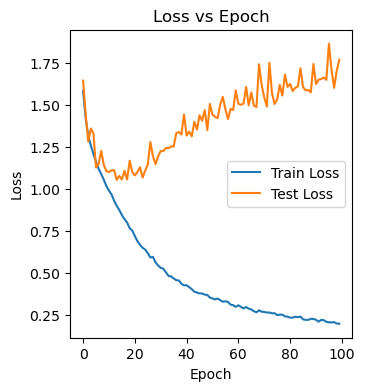

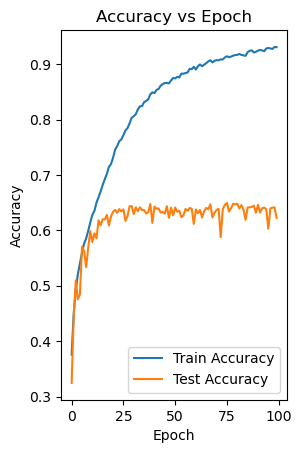

In [18]:
# Train the model
history = model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test))

# Evaluate the model on the test dataset
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 4))

# Plot loss vs epoch for both train and test
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy vs epoch for both train and test
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save the model

In [19]:
model_json = model.to_json()
with open("CNN_Kaggle.json",'w') as json_file:
    json_file.write(model_json)
model.save("CNN_Kaggle.h5")